In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import mediapipe as mp
import time
#from IPython.display import display, HTML, clear_output
%matplotlib inline 

In [3]:
source_directory_path = './one'

In [263]:
#DONT RUN, if you wish to, remove the comment on the start of for loop

mp_hands = mp.solutions.hands                                                  # min detection is finding the hand in the image
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1,model_complexity=1, min_detection_confidence=0.7)


image_files = [filename for filename in os.listdir(source_directory_path) if filename.endswith('.jpg')]

image_files.sort()



processed_images = 0
rows_of_data = 0


start_time = time.time()

hand_coordinates = []

#for idx, filename in enumerate(image_files, start=1):
    if rows_of_data >= 10000:
        break

    source_image_path = os.path.join(source_directory_path, filename)
    
    image = cv2.imread(source_image_path)
    
    if image is None:
        continue
    
    height, width, _ = image.shape
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    results = hands.process(image_rgb)
    
    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]
        
        last_four_landmarks = hand_landmarks.landmark[-16:]
        last_four_coords = [(landmark.x * width, landmark.y * height) for landmark in last_four_landmarks]
        
        hand_coordinates.append(last_four_coords)
        rows_of_data += 1
    
    processed_images += 1

end_time = time.time()
execution_time = end_time - start_time

print("Total execution time:", execution_time, "seconds")
print("Total processed images:", processed_images)
print("Total rows of data:", rows_of_data)

hands.close()


Total execution time: 1407.5390403270721 seconds
Total processed images: 20312
Total rows of data: 10000


In [264]:
hand_coordinates_df = pd.DataFrame(hand_coordinates)

hand_coordinates_df['class'] = '1'

hand_coordinates_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,class
0,"(136.17037963867188, 294.6694664657116)","(137.9950408935547, 271.9667158126831)","(138.75160217285156, 256.6427087187767)","(136.96798706054688, 244.15040588378906)","(125.1032943725586, 297.533779412508)","(129.4042510986328, 285.5799677371979)","(134.612060546875, 300.4229457974434)","(134.5941925048828, 310.72651767730713)","(115.37937927246094, 304.3905804157257)","(120.39070129394531, 297.4409810304642)","(127.46351623535156, 310.5715551674366)","(128.30738830566406, 318.29891857504845)","(106.47434997558594, 314.1538088321686)","(112.63398742675781, 308.9717346727848)","(120.91494750976562, 318.10715425014496)","(123.8569564819336, 324.5308215022087)",1
1,"(122.6353988647461, 400.02280628681183)","(125.16149139404297, 382.90823233127594)","(126.82070922851562, 370.90361177921295)","(127.36300659179688, 361.6694927215576)","(113.11005401611328, 403.86872375011444)","(105.83837127685547, 397.26354920864105)","(106.69855499267578, 405.42617762088776)","(108.93528747558594, 411.6430722475052)","(105.73869323730469, 410.9300944805145)","(100.80445861816406, 410.23837888240814)","(105.53849029541016, 418.03059577941895)","(109.63084411621094, 421.3315066099167)","(101.17774200439453, 419.4964178800583)","(98.12303161621094, 417.67690777778625)","(101.81590270996094, 423.7533903121948)","(105.25059509277344, 426.8918091058731)",1
2,"(160.76046752929688, 207.0148097872734)","(161.45352172851562, 183.27348667383194)","(161.78955078125, 167.7359252423048)","(160.48513793945312, 154.92426285147667)","(148.75570678710938, 211.78180506825447)","(140.78823852539062, 197.54133459925652)","(148.42958068847656, 210.8194823861122)","(154.17799377441406, 221.64029482007027)","(139.25057983398438, 220.29713034629822)","(136.49642944335938, 213.60553041100502)","(146.692626953125, 225.16984942555428)","(151.4478302001953, 232.76716482639313)","(131.78033447265625, 231.0278923213482)","(133.61865234375, 224.8358444571495)","(142.0084991455078, 233.29173317551613)","(145.5286407470703, 239.29085648059845)",1
3,"(172.7982940673828, 291.02274855971336)","(171.1865234375, 262.67800283432007)","(169.21446228027344, 243.976289331913)","(165.27569580078125, 228.26594460010529)","(156.844970703125, 297.65424022078514)","(153.1070098876953, 281.1631189286709)","(158.6973114013672, 301.36975798010826)","(162.46173095703125, 312.16484171152115)","(144.387939453125, 307.7870948314667)","(139.4122314453125, 296.0950075685978)","(148.0926971435547, 313.4998641908169)","(154.58258056640625, 323.2216702103615)","(134.62411499023438, 320.93413615226746)","(129.5164031982422, 312.2648864686489)","(138.44947814941406, 321.6532778143883)","(145.85243225097656, 326.9351728260517)",1
4,"(198.32530212402344, 246.80756613612175)","(205.58334350585938, 222.12374609708786)","(209.26553344726562, 207.1353723704815)","(211.07565307617188, 193.43781009316444)","(184.30946350097656, 244.45764404535294)","(189.06918334960938, 231.1499611735344)","(186.58291625976562, 248.64110258221626)","(182.65725708007812, 258.6246533691883)","(171.43772888183594, 246.1769279539585)","(174.44122314453125, 235.25664070248604)","(175.47799682617188, 253.31448528170586)","(173.2122039794922, 262.53099912405014)","(157.91366577148438, 250.63906660676003)","(162.4560546875, 240.70532447099686)","(165.09469604492188, 254.13937109708786)","(163.48577880859375, 262.66835457086563)",1


In [265]:
hand_coordinates_df.shape

(10000, 17)

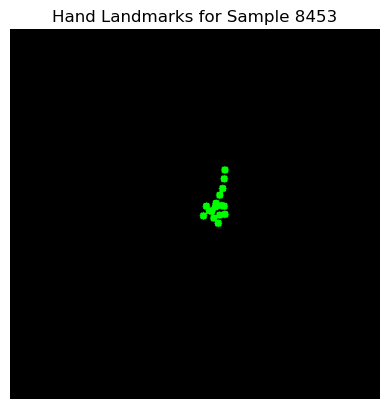

In [275]:
sample_idx = 8452 # index num, testing 

sample_landmarks = hand_coordinates_df.iloc[sample_idx, :-1]  # Exclude the last column which is the class label

# Create a blank canvas
canvas = np.zeros((500, 500, 3), dtype=np.uint8)

for landmark in sample_landmarks:
    x, y = landmark
    cv2.circle(canvas, (int(x), int(y)), 5, (0, 255, 0), -1) #green circle for x in each landmark

plt.imshow(canvas)
plt.title(f"Hand Landmarks for Sample {sample_idx + 1}")
plt.axis('off')
plt.show()

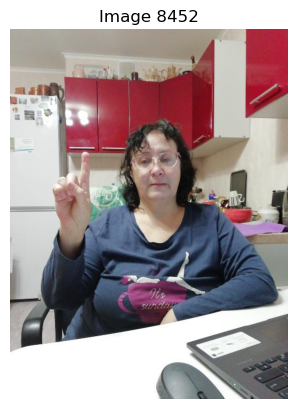

In [5]:
folder_path = './one'

files = os.listdir(folder_path)

files.sort()

image_path = os.path.join(folder_path, files[8452])

image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Image 8452")
plt.axis('off')
plt.show()

In [268]:
hand_coordinates_df.to_csv('./hand_coordinates_df_1.csv')

## Results for each class under same parameters

(static_image_mode=True, max_num_hands=1,model_complexity=1, min_detection_confidence=0.7)
#for 4 
Total execution time: 552.2423655986786 seconds
Total processed images: 11276
Total rows of data: 10000

forr 3
Total execution time: 929.666136264801 seconds
Total processed images: 11508
Total rows of data: 10000

for 1
Total execution time: 1407.5390403270721 seconds
Total processed images: 20312
Total rows of data: 10000

## Make 1 df for the 3 classes

In [281]:
df1 = pd.read_csv("./hand_coordinates_df_1.csv", usecols=lambda column: column != 'Unnamed: 0')
df2 = pd.read_csv("./hand_coordinates_df_3.csv", usecols=lambda column: column != 'Unnamed: 0')
df3 = pd.read_csv("./hand_coordinates_df_4.csv", usecols=lambda column: column != 'Unnamed: 0')

In [283]:
media_pipe_df = pd.concat([df1,df2,df3],ignore_index=True)

In [284]:
media_pipe_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,class
0,"(136.17037963867188, 294.6694664657116)","(137.9950408935547, 271.9667158126831)","(138.75160217285156, 256.6427087187767)","(136.96798706054688, 244.15040588378906)","(125.1032943725586, 297.533779412508)","(129.4042510986328, 285.5799677371979)","(134.612060546875, 300.4229457974434)","(134.5941925048828, 310.72651767730713)","(115.37937927246094, 304.3905804157257)","(120.39070129394531, 297.4409810304642)","(127.46351623535156, 310.5715551674366)","(128.30738830566406, 318.29891857504845)","(106.47434997558594, 314.1538088321686)","(112.63398742675781, 308.9717346727848)","(120.91494750976562, 318.10715425014496)","(123.8569564819336, 324.5308215022087)",1
1,"(122.6353988647461, 400.02280628681183)","(125.16149139404297, 382.90823233127594)","(126.82070922851562, 370.90361177921295)","(127.36300659179688, 361.6694927215576)","(113.11005401611328, 403.86872375011444)","(105.83837127685547, 397.26354920864105)","(106.69855499267578, 405.42617762088776)","(108.93528747558594, 411.6430722475052)","(105.73869323730469, 410.9300944805145)","(100.80445861816406, 410.23837888240814)","(105.53849029541016, 418.03059577941895)","(109.63084411621094, 421.3315066099167)","(101.17774200439453, 419.4964178800583)","(98.12303161621094, 417.67690777778625)","(101.81590270996094, 423.7533903121948)","(105.25059509277344, 426.8918091058731)",1
2,"(160.76046752929688, 207.0148097872734)","(161.45352172851562, 183.27348667383194)","(161.78955078125, 167.7359252423048)","(160.48513793945312, 154.92426285147667)","(148.75570678710938, 211.78180506825447)","(140.78823852539062, 197.54133459925652)","(148.42958068847656, 210.8194823861122)","(154.17799377441406, 221.64029482007027)","(139.25057983398438, 220.29713034629822)","(136.49642944335938, 213.60553041100502)","(146.692626953125, 225.16984942555428)","(151.4478302001953, 232.76716482639313)","(131.78033447265625, 231.0278923213482)","(133.61865234375, 224.8358444571495)","(142.0084991455078, 233.29173317551613)","(145.5286407470703, 239.29085648059845)",1
3,"(172.7982940673828, 291.02274855971336)","(171.1865234375, 262.67800283432007)","(169.21446228027344, 243.976289331913)","(165.27569580078125, 228.26594460010529)","(156.844970703125, 297.65424022078514)","(153.1070098876953, 281.1631189286709)","(158.6973114013672, 301.36975798010826)","(162.46173095703125, 312.16484171152115)","(144.387939453125, 307.7870948314667)","(139.4122314453125, 296.0950075685978)","(148.0926971435547, 313.4998641908169)","(154.58258056640625, 323.2216702103615)","(134.62411499023438, 320.93413615226746)","(129.5164031982422, 312.2648864686489)","(138.44947814941406, 321.6532778143883)","(145.85243225097656, 326.9351728260517)",1
4,"(198.32530212402344, 246.80756613612175)","(205.58334350585938, 222.12374609708786)","(209.26553344726562, 207.1353723704815)","(211.07565307617188, 193.43781009316444)","(184.30946350097656, 244.45764404535294)","(189.06918334960938, 231.1499611735344)","(186.58291625976562, 248.64110258221626)","(182.65725708007812, 258.6246533691883)","(171.43772888183594, 246.1769279539585)","(174.44122314453125, 235.25664070248604)","(175.47799682617188, 253.31448528170586)","(173.2122039794922, 262.53099912405014)","(157.91366577148438, 250.63906660676003)","(162.4560546875, 240.70532447099686)","(165.09469604492188, 254.13937109708786)","(163.48577880859375, 262.66835457086563)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,"(166.1824951171875, 358.4592045545578)","(177.47303771972656, 328.13265666365623)","(182.52691650390625, 308.7441252171993)","(185.30490112304688, 292.5683433711529)","(148.1111602783203, 355.4517146348953)","(153.282958984375, 322.4600273370743)","(155.28392028808594, 300.42143952846527)","(155.5493927001953, 281.92311304807663)","(131.07623291015625, 360.4488637447357)","(126.25633239746094, 332.3162576854229)","(124.26493835449219, 312.6245387196541)","(122.41954803466797, 296.571049630

In [285]:
media_pipe_df.to_csv("./media_pipe_NN.csv",index=False)

In [ ]:
'''
# if u want to store the images with landmarks too
processed_images = 0

start_time = time.time()

hand_coordinates = []

for idx, filename in enumerate(image_files, start=1):
    if processed_images >= 1:
        break

    source_image_path = os.path.join(source_directory_path, filename)
    
    image = cv2.imread(source_image_path)
    
    if image is None:
        continue
    
    height, width, _ = image.shape
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    results = hands.process(image_rgb)
    
    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]
        
        # Select a subset of hand landmarks (umm sample first 4 landmarks)
        selected_landmarks = hand_landmarks.landmark[:]
        
        hand_landmark_coords = [(landmark.x * width, landmark.y * height) for landmark in selected_landmarks]
        
        hand_coordinates.append(hand_landmark_coords)
        
        # Crop the hand region and resize to 28x28 pixels
        min_x = min(int(landmark.x * width) for landmark in hand_landmarks.landmark)
        max_x = max(int(landmark.x * width) for landmark in hand_landmarks.landmark)
        min_y = min(int(landmark.y * height) for landmark in hand_landmarks.landmark)
        max_y = max(int(landmark.y * height) for landmark in hand_landmarks.landmark)
        cropped_image = image[min_y:max_y, min_x:max_x]
        resized_image = cv2.resize(cropped_image, (28, 28))
        
        # Save the resized image
        new_filename = f"Four_{idx}.png"
        destination_image_path = os.path.join(destination_directory_path, new_filename)
        cv2.imwrite(destination_image_path, resized_image)
    
    processed_images += 1

end_time = time.time()
execution_time = end_time - start_time

print("Total execution time:", execution_time, "seconds")
print("Total processed images:", processed_images)

hands.close()

In [6]:
import cv2
import mediapipe as mp
import os

In [12]:
mp_hands = mp.solutions.hands

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, model_complexity=1, min_detection_confidence=0.7)

In [15]:
source_image_path = "Emman_testing2.jpg"

image = cv2.imread(source_image_path)

In [ ]:
if image is not None:
    height, width, _ = image.shape
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    results = hands.process(image_rgb)
    
    hand_coordinates = []
    
    if results is not None and results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]
        last_four_landmarks = hand_landmarks.landmark[-16:]
        last_four_coords = [(landmark.x * width, landmark.y * height) for landmark in last_four_landmarks]
        
        hand_coordinates.append(last_four_coords)
        
        for landmark in hand_landmarks.landmark:
            x, y = int(landmark.x * width), int(landmark.y * height)
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
        
        print("Hand coordinates:", hand_coordinates)
        
        cv2.imshow("Hand Landmarks", image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        hands.close()
        
    else:
        print("No hands detected in the image.")
else:
    print("Unable to load the image.")

Hand coordinates: [[(42.042014598846436, 112.0432676076889), (29.70887318253517, 77.62984329462051), (23.055706024169922, 53.87808632850647), (18.742489516735077, 33.730963706970215), (65.83101630210876, 108.15393650531769), (63.5551592707634, 68.09233921766281), (63.23078319430351, 40.62061542272568), (62.98178121447563, 17.394208788871765), (85.16263127326965, 115.3384884595871), (93.12225043773651, 78.37938165664673), (97.87912875413895, 53.68258100748062), (101.34620785713196, 32.73713117837906), (102.23072290420532, 130.73896658420563), (115.10535031557083, 102.96184438467026), (122.72435635328293, 84.31736540794373), (128.29068511724472, 67.42272812128067)]]


In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
hand_coordinates = [[(42.042014598846436, 112.0432676076889), (29.70887318253517, 77.62984329462051), 
                     (23.055706024169922, 53.87808632850647), (18.742489516735077, 33.730963706970215), 
                     (65.83101630210876, 108.15393650531769), (63.5551592707634, 68.09233921766281), 
                     (63.23078319430351, 40.62061542272568), (62.98178121447563, 17.394208788871765), 
                     (85.16263127326965, 115.3384884595871), (93.12225043773651, 78.37938165664673), 
                     (97.87912875413895, 53.68258100748062), (101.34620785713196, 32.73713117837906), 
                     (102.23072290420532, 130.73896658420563), (115.10535031557083, 102.96184438467026), 
                     (122.72435635328293, 84.31736540794373), (128.29068511724472, 67.42272812128067)]]

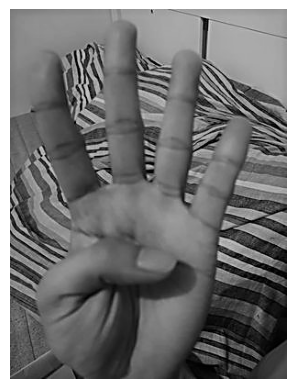

In [20]:
image_path = os.path.join(os.getcwd(), 'Emman_testing.jpg')
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

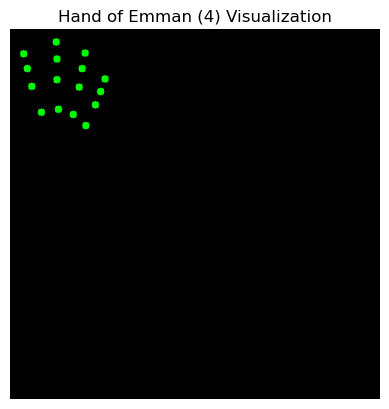

In [13]:
canvas = np.zeros((500, 500, 3), dtype=np.uint8)

for landmarks in hand_coordinates:
    for landmark in landmarks:
        x, y = landmark
        cv2.circle(canvas, (int(x), int(y)), 5, (0, 255, 0), -1)  # Green circle for each landmark


plt.imshow(canvas)
plt.title("Hand of Emman (4) Visualization")
plt.axis('off')
plt.show()